In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
start = '2014-01-01'
end = '2025-01-01'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [9]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2014-01-02,27.624825,27.739730,27.504212,27.682899,73129082
2014-01-03,27.423307,27.719380,27.421570,27.671483,66917888
2014-01-06,27.729057,27.767275,27.459043,27.622094,71037271
2014-01-07,28.263624,28.284224,27.824357,27.919655,102486711
2014-01-08,28.322443,28.473582,28.125391,28.440823,90036218
...,...,...,...,...,...
2024-12-24,197.570007,197.669998,195.197998,196.169998,6809800
2024-12-26,197.100006,198.160004,195.869995,196.740005,7907900


In [10]:
ma_100_days = data.Close.rolling(100).mean()

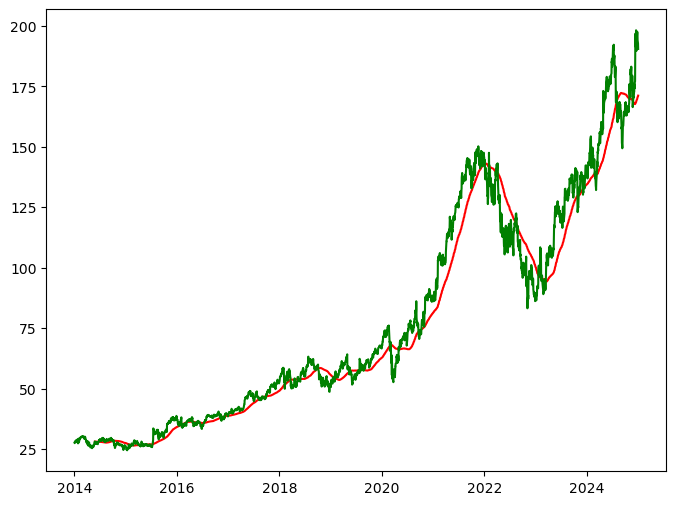

In [11]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close,'g')
plt.show()

In [12]:
ma_200_days = data.Close.rolling(200).mean()

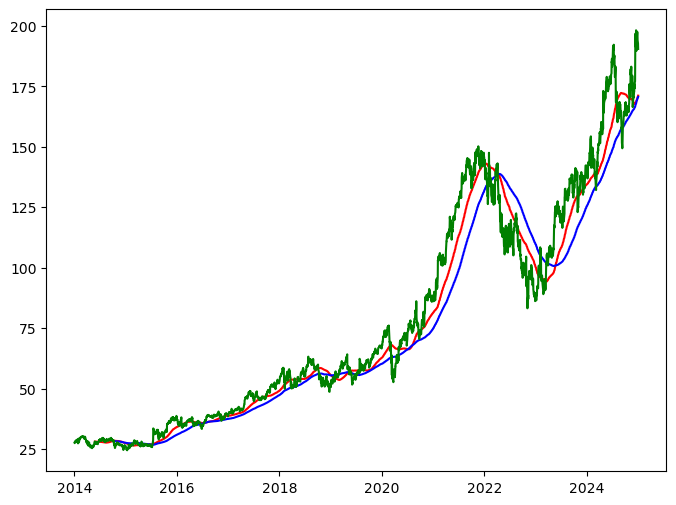

In [13]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close,'g')
plt.show()

In [14]:
data.dropna(inplace = True)

In [18]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.8)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [19]:
data_train.shape[0]

2214

In [20]:
data_test.shape[0]

554

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [22]:
data_train_scale = scaler.fit_transform(data_train)

In [30]:
x = []
y = []

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [33]:
x,y = np.array(x), np.array(y)

In [77]:
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

In [78]:
model = Sequential([
    Input(shape=(x.shape[1], 1)),  # Explicit Input layer

    LSTM(units=50, activation='relu', return_sequences=True),
    Dropout(0.2),

    LSTM(units=60, activation='relu', return_sequences=True),
    Dropout(0.3),

    LSTM(units=80, activation='relu', return_sequences=True),
    Dropout(0.4),

    LSTM(units=120, activation='relu', return_sequences=False),
    Dropout(0.5),

    Dense(units=1)
])

In [79]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [80]:
model.fit(x,y,epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.1811
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0300
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0202
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0150
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0136
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0102
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0117
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0100
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0094
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0106
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0085
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0111
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0087
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0090
Epoch 15/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - lo

In [81]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [82]:
pas_100_days = data_train.tail(100)

In [83]:
data_test = pd.concat([pas_100_days,data_test],ignore_index = True)

In [84]:
data_test

Ticker,GOOG
0,105.460571
1,107.908272
2,112.395157
3,113.630722
4,113.728363
...,...
849,197.570007
850,197.100006
851,194.039993
852,192.690002


In [85]:
data_test_scale = scaler.transform(data_test) 

In [86]:
x = []
y = []

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

In [87]:
y_predict = model.predict(x)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [88]:
y_predict

array([[0.17972273],
       [0.17760916],
       [0.17471986],
       [0.17376317],
       [0.17691293],
       [0.1845497 ],
       [0.19614244],
       [0.20991501],
       [0.2240615 ],
       [0.23719753],
       [0.24835071],
       [0.2567273 ],
       [0.2616567 ],
       [0.2628749 ],
       [0.26075587],
       [0.25604343],
       [0.24908683],
       [0.24022996],
       [0.23038472],
       [0.22063205],
       [0.21244696],
       [0.20807837],
       [0.20898488],
       [0.21433172],
       [0.22233553],
       [0.2305189 ],
       [0.23703043],
       [0.24157855],
       [0.24461484],
       [0.24734342],
       [0.25093746],
       [0.2553537 ],
       [0.25972044],
       [0.26284644],
       [0.26397982],
       [0.26306355],
       [0.26024532],
       [0.25617513],
       [0.25162393],
       [0.24732384],
       [0.24307959],
       [0.23845257],
       [0.2327427 ],
       [0.22651088],
       [0.22091281],
       [0.21756126],
       [0.21745312],
       [0.220

In [89]:
scale = 1 / scaler.scale_[0]  # Extract correct scaling factor
y_predict = y_predict.reshape(-1) * scale  # Flatten
y = y.reshape(-1) * scale  # Flatten

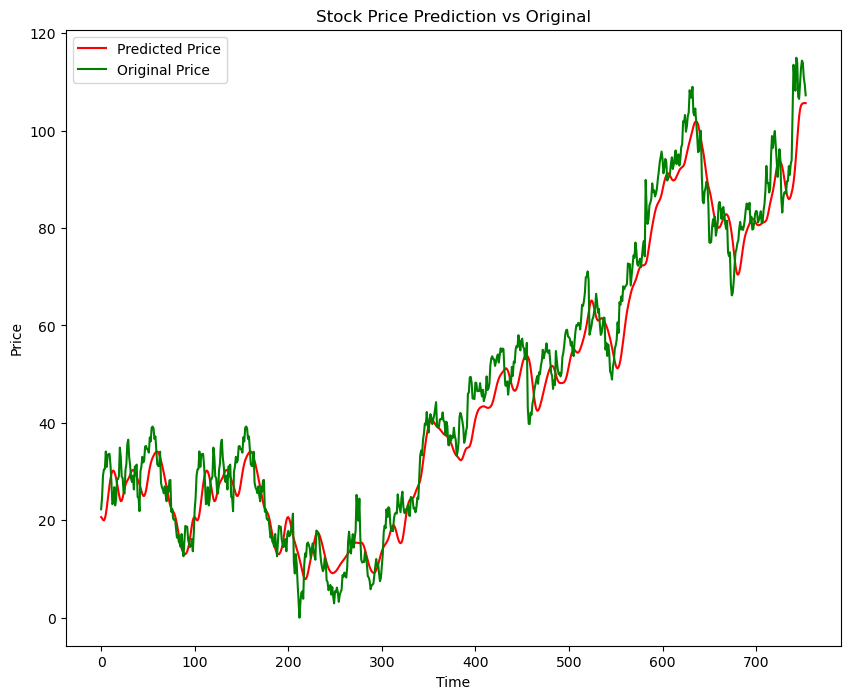

In [90]:
plt.figure(figsize=(10, 8))  # Fixed missing parenthesis
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Stock Price Prediction vs Original')
plt.show()

In [91]:
model.save('Stock Predictions Model.keras')